In [1]:
pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable


Note: you may need to restart the kernel to use updated packages.


In [2]:
!pip install mysql-connector-python
!pip install mysql-connector

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [3]:
# Importar librerías para manipulación y análisis de datos
# -----------------------------------------------------------------------
import pandas as pd
from pandas import DataFrame
import numpy as np
pd.set_option('display.max_columns', None)  # Establece una opción de Pandas para mostrar todas las columnas de un DataFrame.

# Imputación de nulos usando métodos avanzados estadísticos
# -----------------------------------------------------------------------
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

# Librerías de visualización
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

# establece el estilo del fondo de las gráficas como "whitegrid". Las gráficas tendrán un fondo blanco con líneas de cuadrícula horizontales y verticales.
sns.set_style("whitegrid")

# cambiará el esquema de colores predeterminado de Seaborn a uno más oscuro, adecuado para gráficas con fondos claros. 
sns.set_theme(style="dark")

# establece el estilo en Solarize_Lihgt2. 
plt.style.use('Solarize_Light2')

# Evaluar linealidad de las relaciones entre las variables
# ------------------------------------------------------------------------------
from scipy.stats import shapiro, kstest

import scipy.stats as stats

# -----------------------------------------------------------------------
from scipy.stats import chi2_contingency
from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu
from scipy.stats import levene

import mysql.connector
from mysql.connector import errorcode

In [4]:
df_data_original =pd.read_csv("DATA.CSV",index_col=0)
df_data_original.head(2).T

,0,1
Age,51,52
Attrition,No,No
BusinessTravel,NaN,NaN
DailyRate,"684,0$","699,0$"
Department,NaN,NaN
DistanceFromHome,6,1
Education,3,4
EducationField,NaN,Life Sciences
employeecount,1,1
employeenumber,"162,0","259,0"


In [5]:
df_data_copy= df_data_original.copy()

In [6]:
df_data_copy.head(2)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,employeecount,employeenumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NUMCOMPANIESWORKED,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TOTALWORKINGYEARS,TrainingTimesLastYear,WORKLIFEBALANCE,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YEARSWITHCURRMANAGER,SameAsMonthlyIncome,DateBirth,Salary,RoleDepartament,NUMBERCHILDREN,RemoteWork
0,51,No,NaN,"684,0$",NaN,6,3,NaN,1,"162,0",1,0,51,3,5,resEArch DIREcToR,3,NaN,"19537,0",6462,7,Y,No,13,"3,0",3,NaN,0,NaN,5,"3,0",20,NaN,15,15,"19537,0",1972,1000000000$,NaN,NaN,Yes
1,52,No,NaN,"699,0$",NaN,1,4,Life Sciences,1,"259,0",3,0,65,2,5,ManAGeR,3,NaN,"19999,0",5678,0,NaN,NaN,14,"3,0",1,NaN,1,"34,0",5,"3,0",33,NaN,11,9,"19999,0",1971,1000000000$,NaN,NaN,1


# FASE 1.ANÁLISIS EXPLORATORIO (EDA)

In [7]:
# Análisis realizado en archivo "fase1_eda.ipynb"

# FASE 2. TRANSFORMACIÓN DE DATOS
- 2.0 Homogeneización nombre columnas
- 2.1 Modificar columnas categóricas a numéricas
- 2.2 Homogeneizar las etiquetas de las columnas categóricas
- 2.3 Modificar valores erróneos a nulos
- 2.4 Creación de nuevas columnas
- 2.5 Duplicados
- 2.6 Nulos
- 2.7 Eliminar columnas
- 2.8 Verificación de categorías
- 2.9 Análisis de registros para el mismo empleado (mismo employeenumber)

#### 2.0 Homogeneización nombre columnas

In [8]:
nuevas_columnas={columna:columna.lower() for columna in df_data_copy} #modificamos las columnas a minúsculas
df_data_copy.rename(columns= nuevas_columnas, inplace= True) #cambiamos las columnas antiguas por las homogeneizadas en el paso anterior (nuevas_columnas)

In [9]:
df_data_copy.columns

Index(['age', 'attrition', 'businesstravel', 'dailyrate', 'department',
       'distancefromhome', 'education', 'educationfield', 'employeecount',
       'employeenumber', 'environmentsatisfaction', 'gender', 'hourlyrate',
       'jobinvolvement', 'joblevel', 'jobrole', 'jobsatisfaction',
       'maritalstatus', 'monthlyincome', 'monthlyrate', 'numcompaniesworked',
       'over18', 'overtime', 'percentsalaryhike', 'performancerating',
       'relationshipsatisfaction', 'standardhours', 'stockoptionlevel',
       'totalworkingyears', 'trainingtimeslastyear', 'worklifebalance',
       'yearsatcompany', 'yearsincurrentrole', 'yearssincelastpromotion',
       'yearswithcurrmanager', 'sameasmonthlyincome', 'datebirth', 'salary',
       'roledepartament', 'numberchildren', 'remotework'],
      dtype='object')

#### 2.1 Cambiar de strings (objeto) a numéricas

In [10]:
#____STRING A INT_________
#age:               12 valores en letras: cambiarlos a nros + convertir todos los nros a int.
#worklifebalance quitar ",0" y convertir a int.

#____STRING A FLOAT_________
#totalworkingyears: cambiar comas por puntos
#daily rate (comas por puntos y quitarle el símbolo del dolar)
#hourly rate
#monthlyincome
#monthlyrate

In [11]:
#Age:
def texto_nro(cadena):
    cadena = cadena.replace("twenty-six","26").replace("twenty-four","24").replace("thirty-two","32").replace("thirty-six","36").replace("thirty-seven","37").replace("thirty-one","31").replace("thirty","30").replace("forty-seven","47").replace("fifty-two","52").replace("fifty-five","55").replace("fifty-eight","58")
    return int(cadena)

df_data_copy["age"] = df_data_copy["age"].apply(texto_nro)


In [12]:
#employeenumber

In [13]:
df_data_copy["employeenumber"].isnull().sum()

431

In [14]:
df_data_copy["employeenumber"]

0       162,0
1       259,0
2       319,0
3         NaN
4         NaN
        ...  
1609    967,0
1610    972,0
1611      NaN
1612    990,0
1613      NaN
Name: employeenumber, Length: 1614, dtype: object

In [15]:
#Worklifebalance y employeenumber

def nro(cadena):

    try: 
        cadena = cadena.replace(",0","")
        return float(cadena)
    
    except: 
        return np.nan #tiene varios valores que son "nan"

df_data_copy["worklifebalance"] = df_data_copy["worklifebalance"].apply(nro)

In [16]:
df_data_copy["employeenumber"] = df_data_copy["employeenumber"].apply(nro)

In [17]:
#dailyrate 
def daily(nro):
    try:
        return float(nro.replace(",0$",""))
    except:
        return np.nan

df_data_copy["dailyrate"] = df_data_copy["dailyrate"].apply(daily)

In [18]:
# totalworkingyears", "monthlyincome", "monthlyrate: Cambio de string a float

def decimal(cadena):

    try: 
        return float(cadena.replace(",",".").replace("$","."))

    except: 
        return np.nan #tiene varios valores que son "nan"
    
columnas_decimal = ["totalworkingyears", "monthlyincome"]

for columna in columnas_decimal:
    df_data_copy[columna] = df_data_copy[columna].apply(decimal)

In [19]:
# "hourlyrate", "monthlyrate" : cambio de string a float - no tienen decimales

def decimal3(cadena):
    try:
        return float(cadena)
    except:
        return np.nan

col_dec_ent = ["hourlyrate", "monthlyrate"]

for columna in col_dec_ent:
    df_data_copy[columna] = df_data_copy[columna].apply(decimal3)

In [20]:
## Nota: hourlyrate - parecía en el original como si no hubiese nulos pero había algunos que eran "Not available" y q contaban como interger

#### 2.2 Homogeneizar categóricas

In [21]:
#Columnas a homogeneizar sus categorías:
# educationfield (minúsculas)
# jobrole (minúsculas)
# maritalstatus(minúsculas y homogeneización)

def homogeneizar(cadena):
    try:
        return cadena.lower().replace("marreid","married")
    except:
        return np.nan

col_homo = ["educationfield", "jobrole", "maritalstatus"]

for columna in col_homo:
    df_data_copy[columna] = df_data_copy[columna].apply(homogeneizar)

In [22]:
# Homogeneizar "remotework" a 2 opciones: Yes, No
df_data_copy["remotework"] = df_data_copy["remotework"].replace({"True": "Yes", 'False': "No", '0': "No", '1': "Yes"})

In [23]:
len(df_data_copy[df_data_copy["distancefromhome"]<0])

192

#### 2.3 Modificar valores erróneos a nulos

In [24]:
#Distancefromhome - Valores negativos (192 valores) a nulos
def convertir_nulos(numero):
    if numero < 0:
        return np.nan
    else:
        return numero

df_data_copy["distancefromhome"] = df_data_copy["distancefromhome"].apply(convertir_nulos)

In [25]:
#Environmentalsatisfaction: modificar valores diferentes a 1-4 a nulos
def convertir_nulos (numero):
    if numero == 1:
        return numero
    elif numero == 2: 
        return numero
    elif numero == 3:
        return numero
    elif numero == 4:
        return numero
    else:
        return np.nan

#Creación de una columna con la función
df_data_copy["environmentsatisfaction"] = df_data_copy["environmentsatisfaction"].apply(convertir_nulos)

#### 2.4 Creación de nuevas columnas

In [26]:
#1. GÉNERO

#Creamos la función 
def categorizar_gender (numero):
    if numero == 0:
        return 'male'
    else:
        return 'female'

In [27]:
#Creación de una columna con la función
df_data_copy.insert(12, 'gender_cat', df_data_copy["gender"].apply(categorizar_gender))

In [28]:
#2. environmentsatisfaction,relationshipsatisfaction,worklifebalance

def categorizar_environmentsatisfaction(valor):

    if valor == 4:
        return "maximun"
    elif valor == 3:
        return "medium"
    elif valor == 2:
        return "little"
    elif valor == 1:
        return "nothing"
    else:
        return "unknown"

#df_data_copy["environmentsatisfaction_cat"] = df_data_copy["environmentsatisfaction"].apply(categorizar_environmentsatisfaction)
#df_data_copy["relationshipsatisfaction_cat"] = df_data_copy["relationshipsatisfaction"].apply(categorizar_environmentsatisfaction)
#df_data_copy["worklifebalance_cat"] = df_data_copy["worklifebalance"].apply(categorizar_environmentsatisfaction)

In [29]:
df_data_copy.insert(11, 'environmentsatisfaction_cat', df_data_copy["environmentsatisfaction"].apply(categorizar_environmentsatisfaction))

In [30]:
df_data_copy.insert(28, 'relationshipsatisfaction_cat', df_data_copy["relationshipsatisfaction"].apply(categorizar_environmentsatisfaction))

In [31]:
df_data_copy.insert(34, 'worklifebalance_cat', df_data_copy["worklifebalance"].apply(categorizar_environmentsatisfaction))


In [32]:
#education
def categorizar_education(valor):
    if valor == 5:
        return "university"
    elif valor == 3:
        return "college"
    elif valor == 2:
        return "high school"
    elif valor == 1:
        return "middle school"
    else:
        return "Unknown"

In [33]:
df_data_copy.insert(7, 'education_cat', df_data_copy["education"].apply(categorizar_education))

In [34]:
#"jobinvolvement"

def categorizar_jobinvolvement(valor):
    if valor == 4:
        return "very involved"
    elif valor == 3:
        return "involved"
    elif valor == 2:
        return "little involved"
    elif valor == 1:
        return "not involved"
    else:
        return "Unknown"

In [35]:
df_data_copy.insert(17, 'jobinvolvement_cat', df_data_copy["jobinvolvement"].apply(categorizar_jobinvolvement))

In [36]:
mapa = {"No":0, "Yes":1}

df_data_copy["attrition_number"] = df_data_copy["attrition"].map(mapa)

In [37]:
df_data_copy["attrition_number"].value_counts()

attrition_number
0    1355
1     259
Name: count, dtype: int64

#### 2.5 Duplicados (filas)

In [38]:
#Nro. de duplicados (todas las filas son iguales)
df_data_copy.duplicated().sum()

43

In [39]:
#eliminar duplicados
df_data_copy = df_data_copy.drop_duplicates()
print("Cantidad de filas después de eliminar duplicados:", len(df_data_copy))

Cantidad de filas después de eliminar duplicados: 1571


#### 2.6 Nulos

In [40]:
#1.CATEGÓRICAS - Ana
# businesstravel
# department - muchos nulos
# education field
# marital status - 119
# overtime
# performancerating - 195 nulos
# Role in department - muchos nulos

In [41]:
#Lsta de columnas categoricas con nulos
nulos_esta_cat = df_data_copy[df_data_copy.columns[df_data_copy.isnull().any()]].select_dtypes(include = "O").columns
print("Las columnas categóricas que tienen nulos son : \n ")
print(nulos_esta_cat)

Las columnas categóricas que tienen nulos son : 
 
Index(['businesstravel', 'department', 'educationfield', 'maritalstatus',
       'over18', 'overtime', 'performancerating', 'standardhours',
       'yearsincurrentrole', 'sameasmonthlyincome', 'roledepartament'],
      dtype='object')


In [42]:
df_data_copy.isnull().sum()

age                                0
attrition                          0
businesstravel                   752
dailyrate                        121
department                      1269
distancefromhome                 192
education                          0
education_cat                      0
educationfield                   730
employeecount                      0
employeenumber                   415
environmentsatisfaction          100
environmentsatisfaction_cat        0
gender                             0
gender_cat                         0
hourlyrate                        84
jobinvolvement                     0
jobinvolvement_cat                 0
joblevel                           0
jobrole                            0
jobsatisfaction                    0
maritalstatus                    638
monthlyincome                    824
monthlyrate                        0
numcompaniesworked                 0
over18                           877
overtime                         659
p

In [43]:
# El 'value_counts()' de cada una de las columnas categóricas que tienen nulos para saber como es la distribución de sus categorías
for col in nulos_esta_cat:
    print(f"La distribución de las categorías para la columna {col.upper()}")
    display(df_data_copy[col].value_counts() / df_data_copy.shape[0])
    print("........................")

La distribución de las categorías para la columna BUSINESSTRAVEL


businesstravel
travel_rarely        0.364736
travel_frequently    0.099300
non-travel           0.057288
Name: count, dtype: float64

........................
La distribución de las categorías para la columna DEPARTMENT


department
 Research & Development     0.124761
 Sales                      0.057925
 Human Resources            0.009548
Name: count, dtype: float64

........................
La distribución de las categorías para la columna EDUCATIONFIELD


educationfield
life sciences       0.214513
medical             0.171229
marketing           0.064290
technical degree    0.042648
other               0.035010
human resources     0.007638
Name: count, dtype: float64

........................
La distribución de las categorías para la columna MARITALSTATUS


maritalstatus
married     0.267346
single      0.201782
divorced    0.124761
Name: count, dtype: float64

........................
La distribución de las categorías para la columna OVER18


over18
Y    0.441757
Name: count, dtype: float64

........................
La distribución de las categorías para la columna OVERTIME


overtime
No     0.420751
Yes    0.159771
Name: count, dtype: float64

........................
La distribución de las categorías para la columna PERFORMANCERATING


performancerating
3,0    0.745385
4,0    0.133673
Name: count, dtype: float64

........................
La distribución de las categorías para la columna STANDARDHOURS


standardhours
80,0    0.26098
Name: count, dtype: float64

........................
La distribución de las categorías para la columna YEARSINCURRENTROLE


yearsincurrentrole
2,0     0.006365
7,0     0.002546
0,0     0.002546
4,0     0.001910
1,0     0.001910
11,0    0.001273
6,0     0.001273
3,0     0.001273
13,0    0.000637
12,0    0.000637
Name: count, dtype: float64

........................
La distribución de las categorías para la columna SAMEASMONTHLYINCOME


sameasmonthlyincome
6347,0     0.002546
5304,0     0.002546
2657,0     0.001910
8392,0     0.001273
7756,0     0.001273
             ...   
5368,0     0.000637
12936,0    0.000637
4221,0     0.000637
4963,0     0.000637
19431,0    0.000637
Name: count, Length: 668, dtype: float64

........................
La distribución de las categorías para la columna ROLEDEPARTAMENT


roledepartament
 MaNAgeR  -  Sales                                        0.001273
 ManaGER  -  Research & Development                       0.000637
 ReseaRch scIENTisT  -  Research & Development            0.000637
 ManufacTURInG DIRECtOR  -  Research & Development        0.000637
 hEalthCaRe reprEseNTaTiVe  -  Research & Development     0.000637
                                                            ...   
 saLES eXEcUTiVE  -  Sales                                0.000637
 mANUfacTURiNG dIRectOR  -  Research & Development        0.000637
 huMAn ResOurces  -  Human Resources                      0.000637
 HUMAN ResoURCeS  -  Human Resources                      0.000637
 sAleS EXECUtIvE  -  Sales                                0.000637
Name: count, Length: 301, dtype: float64

........................


Performance rating es la única que tendría posibilidades de cambiar a la moda, las otras tienen valores muy bajos y seria convenientes cmabiar por desconocido. 

In [44]:
#columnas_moda = ['performancerating']
columnas_desconocido = ['businesstravel', 'department', 'educationfield','maritalstatus','overtime']

In [45]:
#Columna moda
# for columna in columnas_moda:
#     moda = df_data_copy[col].mode()[0]    
#     df_data_copy[columna] = df_data_copy[columna].fillna(moda)

# print("Después del reemplazo usando 'fillna' quedan los siguientes nulos")
# df_data_copy[columnas_moda].isnull().sum()

In [46]:
#columna desconocido
for columna in columnas_desconocido:
    df_data_copy[columna] = df_data_copy[columna].fillna("Unknown") 

print("Después del reemplazo usando 'fillna' quedan los siguientes nulos")
df_data_copy[columnas_desconocido].isnull().sum()

Después del reemplazo usando 'fillna' quedan los siguientes nulos


businesstravel    0
department        0
educationfield    0
maritalstatus     0
overtime          0
dtype: int64

In [47]:
#2.NUMÉRICAS - Elena
# hourly_rate = 84 nulos
# Environmental satisfaction 
# monthlyincome
# worklifebalance - 108
# totalworkingyears
# numberofchildren

In [48]:
#Columnas numéricas con nulos 
nulos_num = df_data_copy[df_data_copy.columns[df_data_copy.isnull().any()]].select_dtypes(include = np.number).columns
print(nulos_num)

Index(['dailyrate', 'distancefromhome', 'employeenumber',
       'environmentsatisfaction', 'hourlyrate', 'monthlyincome',
       'totalworkingyears', 'worklifebalance', 'numberchildren'],
      dtype='object')


In [49]:
#% de nulos en las columnas numéricas con nulos
nl = (df_data_copy[nulos_num].isnull().sum() / df_data_copy.shape[0]) * 100
#nl.sort_values(ascending=False).reset_index()
nl.reset_index()

,index,0
0,dailyrate,7.702101
1,distancefromhome,12.221515
2,employeenumber,26.416295
3,environmentsatisfaction,6.365372
4,hourlyrate,5.346913
5,monthlyincome,52.450668
6,totalworkingyears,32.590707
7,worklifebalance,6.619987
8,numberchildren,100.000000


ValueError: List of boxplot statistics and `positions` values must have same the length

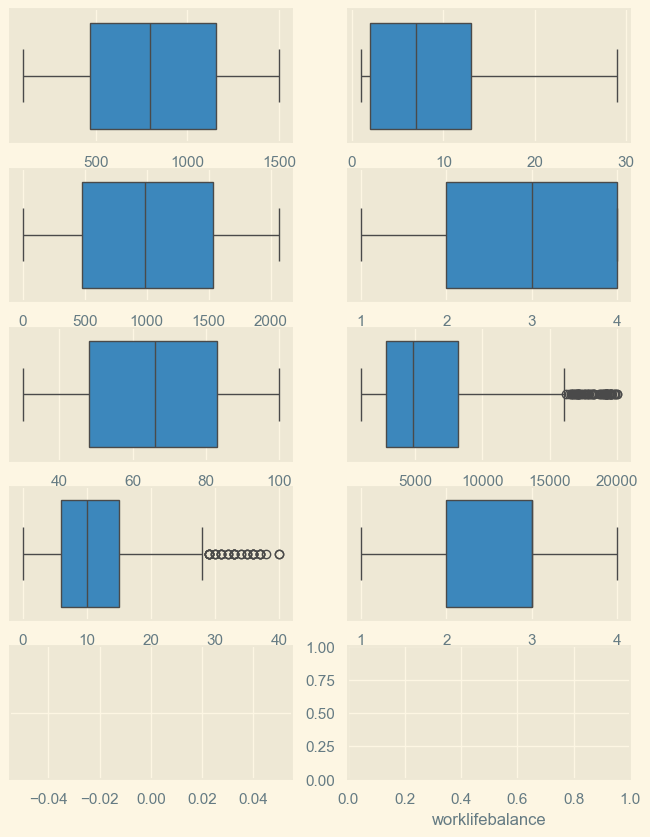

In [50]:
#Valores atípicos
fig, axes = plt.subplots(nrows = 5, ncols = 2, figsize = (8,10)) 
axes = axes.flat

for indice, col in enumerate(nulos_num):
    sns.boxplot(x = col, data = df_data_copy, ax = axes[indice])
    plt.xlabel(col)  

plt.tight_layout()
fig.delaxes(axes[-1])
plt.show();

#### Decisiones: Nulos (numéricas)
- Number of children: borrarla
- Monthly income: borrarla. Tiene 52% de nulos
- Todas las demás: utilizar el iterate y knn imputer - atípicos en totalworkingyears

In [51]:
#ITERATIVE IMPUTER

imputer_iterative = IterativeImputer(max_iter =20, random_state=42)
imputer_iterative_imputado = imputer_iterative.fit_transform(df_data_copy[['environmentsatisfaction', 'hourlyrate','totalworkingyears', 'worklifebalance']])
imputer_iterative_imputado

array([[ 1.        , 51.        , 11.26295761,  3.        ],
       [ 3.        , 65.        , 34.        ,  3.        ],
       [ 3.        , 58.        , 22.        ,  2.76440272],
       ...,
       [ 3.        , 57.        , 11.26615594,  2.        ],
       [ 2.80337015, 41.        ,  9.        ,  3.        ],
       [ 4.        , 75.        , 11.27550094,  3.        ]])

In [52]:
df_data_copy[['environmentsatisfaction_iterativo', 'hourlyrate_iterativo', 'totalworkingyears_iterativo', 'worklifebalance_iterativo']] = imputer_iterative_imputado

In [53]:
#KNN IMPUTER
imputer_knn = KNNImputer(n_neighbors=5)
imputer_knn_imputado = imputer_knn.fit_transform(df_data_copy[['environmentsatisfaction', 'hourlyrate', 'totalworkingyears', 'worklifebalance']])
imputer_knn_imputado

array([[ 1. , 51. ,  8.8,  3. ],
       [ 3. , 65. , 34. ,  3. ],
       [ 3. , 58. , 22. ,  3.4],
       ...,
       [ 3. , 57. ,  6.8,  2. ],
       [ 3.8, 41. ,  9. ,  3. ],
       [ 4. , 75. ,  9. ,  3. ]])

In [54]:
df_data_copy[['environmentsatisfaction_knn', 'hourlyrate_knn', 'totalworkingyears_knn', 'worklifebalance_knn']] = imputer_knn_imputado

In [55]:
#Comparamos las estadísticas generadas de por el iterative y el knn para decidir cuál coger (aquel cuya media y mediana sea más parecida a la original- En la columna con valores atípicos cogemos aquel cuya mediana sea más parecida a la original)
df_data_copy.describe()[['environmentsatisfaction', 'environmentsatisfaction_iterativo', 'environmentsatisfaction_knn', 'hourlyrate', 'hourlyrate_iterativo', 'hourlyrate_knn', 'totalworkingyears', 'totalworkingyears_iterativo', 'totalworkingyears_knn', 'worklifebalance', 'worklifebalance_iterativo', 'worklifebalance_knn']].T

,count,mean,std,min,25%,50%,75%,max
environmentsatisfaction,1471.0,2.716519,1.096311,1.0,2.0,3.000000,4.000000,4.0
environmentsatisfaction_iterativo,1571.0,2.716667,1.060951,1.0,2.0,3.000000,4.000000,4.0
environmentsatisfaction_knn,1571.0,2.733927,1.072951,1.0,2.0,3.000000,4.000000,4.0
hourlyrate,1487.0,65.990585,20.188310,30.0,48.0,66.000000,83.000000,100.0
hourlyrate_iterativo,1571.0,65.981689,19.642171,30.0,49.0,66.000000,83.000000,100.0
hourlyrate_knn,1571.0,66.084405,19.709073,30.0,49.0,66.000000,83.000000,100.0
totalworkingyears,1059.0,11.271010,7.658793,0.0,6.0,10.000000,15.000000,40.0
totalworkingyears_iterativo,1571.0,11.270789,6.287145,0.0,8.0,11.260424,11.286904,40.0
totalworkingyears_knn,1571.0,10.795672,6.563577,0.0,6.6,9.800000,13.000000,40.0
worklifebalance,1467.0,2.762100,0.707576,1.0,2.0,3.000000,3.000000,4.0


### Cuál coger?
- env.satif_iterativo
- hourlyrate_iterativo
- totalworkingyears_iterativo
- worklifebalance_iterativo

In [56]:
df_data_original.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'employeecount',
       'employeenumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NUMCOMPANIESWORKED',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TOTALWORKINGYEARS', 'TrainingTimesLastYear', 'WORKLIFEBALANCE',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YEARSWITHCURRMANAGER', 'SameAsMonthlyIncome', 'DateBirth', 'Salary',
       'RoleDepartament', 'NUMBERCHILDREN', 'RemoteWork'],
      dtype='object')

In [57]:
#Quitamos las columnas originales y las de aquellos métodos q están más alejados de la media y medianas de las originales
df_data_copy.drop(['environmentsatisfaction', 'environmentsatisfaction_knn', 'hourlyrate', 'hourlyrate_knn', 'totalworkingyears', 'totalworkingyears_knn', 'worklifebalance', 'worklifebalance_knn'], axis = 1, inplace = True)

In [58]:
nuevas_columnas = {'age': 'age', 'attrition': 'attrition', 'businesstravel': 'businesstravel', 
                    'dailyrate': 'dailyrate', 'department': 'department', 
                    'distancefromhome': 'distancefromhome', 'education': 'education', 
                    'education_cat': 'education_cat', 'educationfield': 'educationfield', 
                    'employeecount': 'employeecount', 'employeenumber': 'employeenumber', 
                    'environmentsatisfaction_cat': 'environmentsatisfaction_cat', 'gender': 'gender', 
                    'gender_cat': 'gender_cat', 'jobinvolvement': 'jobinvolvement', 
                    'jobinvolvement_cat': 'jobinvolvement_cat', 'joblevel': 'joblevel', 
                    'jobrole': 'jobrole', 'jobsatisfaction': 'jobsatisfaction', 
                    'maritalstatus': 'maritalstatus', 'monthlyrate': 'monthlyrate', 
                    'numcompaniesworked': 'numcompaniesworked', 'over18': 'over18', 
                    'overtime': 'overtime', 'percentsalaryhike': 'percentsalaryhike', 
                    'performancerating': 'performancerating', 
                    'relationshipsatisfaction': 'relationshipsatisfaction', 
                    'relationshipsatisfaction_cat': 'relationshipsatisfaction_cat', 
                    'standardhours': 'standardhours', 'stockoptionlevel': 'stockoptionlevel', 
                    'trainingtimeslastyear': 'trainingtimeslastyear', 
                    'worklifebalance_cat': 'worklifebalance_cat', 'yearsatcompany': 'yearsatcompany', 
                    'yearsincurrentrole': 'yearsincurrentrole', 
                    'yearssincelastpromotion': 'yearssincelastpromotion', 
                    'yearswithcurrmanager': 'yearswithcurrmanager', 
                    'sameasmonthlyincome': 'sameasmonthlyincome', 
                    'datebirth': 'datebirth', 'salary': 'salary', 
                    'roledepartament': 'roledepartament', 'numberchildren': 'numberchildren', 
                    'remotework': 'remotework', 
                    'environmentsatisfaction_iterativo': 'environmentsatisfaction', 
                    'hourlyrate_iterativo': 'hourlyrate', 
                    'totalworkingyears_iterativo': 'totalworkingyears', 
                    'worklifebalance_iterativo': 'worklifebalance'}

In [59]:
df_data_copy.rename(columns = nuevas_columnas, inplace = True)

In [60]:
#NOTA: Para crear las columnas de iterativo y de knn automáticamente

#---------------ITERATIVE-----------------------------------
# palabras = ['environmentsatisfaction', 'hourlyrate', 'monthlyincome',
#        'totalworkingyears', 'worklifebalance', 'numberchildren']

# palabras_iterativas = [palabra + '_iterativo' for palabra in palabras]

# print(palabras_iterativas)

# #---------------KNN-----------------------------------

# palabras2 = ['environmentsatisfaction', 'hourlyrate', 'monthlyincome',
#        'totalworkingyears', 'worklifebalance', 'numberchildren']

# palabras_iterativas = [palabra + '_knn' for palabra in palabras2]

# print(palabras_iterativas)

# #---------------TODAS JUNTAS-----------------------------------

# pal = ['environmentsatisfaction', 'hourlyrate', 'monthlyincome',
#        'totalworkingyears', 'worklifebalance', 'numberchildren']

# pal2 = ['environmentsatisfaction_iterativo', 'hourlyrate_iterativo', 'monthlyincome_iterativo', 'totalworkingyears_iterativo', 'worklifebalance_iterativo', 'numberchildren_iterativo']


# pal3 = ['environmentsatisfaction_knn', 'hourlyrate_knn', 'monthlyincome_knn', 'totalworkingyears_knn', 'worklifebalance_knn', 'numberchildren_knn']


# lista_concatenada = [item for sublist in zip(pal, pal2, pal3) for item in sublist]

# print(lista_concatenada)

#### 2.7 Eliminar columnas

In [61]:
# -Numberofchildren
# - over18
# - datebirth - No aporta nada nuevo ya que tenemos una columna con la edad
# - salary - sólo un valor para todos
# - sameasmontlyincome - copia de columna "monthly income"
# - monthlyincome - muchos nulos 52%
# - standardhours
# - employeecount
# - roledepartment
# - performancerating
# - years in currentrole

In [62]:
columnas_drop = ["numberchildren", "over18","datebirth","salary","sameasmonthlyincome", "monthlyincome","standardhours","employeecount", "performancerating", "yearsincurrentrole", "roledepartament"]

In [63]:
df_data_copy.drop(columns = columnas_drop, axis=1, inplace=True)

In [64]:
df_data_copy.columns

Index(['age', 'attrition', 'businesstravel', 'dailyrate', 'department',
       'distancefromhome', 'education', 'education_cat', 'educationfield',
       'employeenumber', 'environmentsatisfaction_cat', 'gender', 'gender_cat',
       'jobinvolvement', 'jobinvolvement_cat', 'joblevel', 'jobrole',
       'jobsatisfaction', 'maritalstatus', 'monthlyrate', 'numcompaniesworked',
       'overtime', 'percentsalaryhike', 'relationshipsatisfaction',
       'relationshipsatisfaction_cat', 'stockoptionlevel',
       'trainingtimeslastyear', 'worklifebalance_cat', 'yearsatcompany',
       'yearssincelastpromotion', 'yearswithcurrmanager', 'remotework',
       'attrition_number', 'environmentsatisfaction', 'hourlyrate',
       'totalworkingyears', 'worklifebalance'],
      dtype='object')

#### 2.8 Verificación de clasificaciones categóricas
- education (1 menos y 5 más educación)
    Parece que es así pero hay personas con un nivel "1" de educación que son directores y managers y tb 1 q tienenn altos "hourlyrates"

- jobinvolvement (1 menos y 4 máximo) -  a priori
    No puedo determinarlo, no parece q esté unico a jobsatisfaction

- jobsatisfaction (1 mínimo y 4 máximo) - a priori
    No puedo determinarlo, no parece q esté unico a jobsatisfaction

- joblevel (1 mínimo y 5 máximo) - a priori
    Sí, el 1 son técnicos el 5 son managers, directores

- relationshiptsatisfaction (1 mínimo y 4 máximo) - a priori
    No guarda una relación directa con otras columnas

- stockoption (0 sin opciones y 1-3 de pocas acciones a muchas) - a priori
No guarda una relación directa con otras columnas. Hay empleados q llevan 0 años trabjando y tienen el nivel 3 de opciones. y tampoco por el tipo de posición hay relación

- workinglifebalance (1 mínimo -4 máximo) -a prioru
tampoco existe relación directa con otras columnas

In [65]:
#relationshipsatisfaction

In [66]:
#df_data_copy[["education","educationfield","age","joblevel","jobrole", "hourlyrate","monthlyrate","yearsatcompany"]].sort_values(by = "hourlyrate", ascending=False).head(50)

In [67]:
#df_data_copy[["jobinvolvement","environmentsatisfaction","jobsatisfaction"]].sort_values(by = "jobinvolvement", ascending=False).tail(50)

In [68]:
#df_data_copy[["joblevel","jobrole", "hourlyrate","monthlyrate","yearsatcompany","education","educationfield","age"]].sort_values(by = "joblevel", ascending=False).head(50)

In [69]:
#df_data_copy[["jobinvolvement","environmentsatisfaction","jobsatisfaction"]].sort_values(by = "jobsatisfaction", ascending=False).tail(50)

In [70]:
#df_data_copy[["jobinvolvement","environmentsatisfaction","jobsatisfaction", "relationshipsatisfaction"]].sort_values(by = "relationshipsatisfaction", ascending=False).head(50)

In [71]:
#df_data_copy[["stockoptionlevel", "yearsatcompany","totalworkingyears","joblevel","jobrole"]].sort_values(by = "stockoptionlevel", ascending=False).head(50)

In [72]:
#df_data_copy[["worklifebalance","jobinvolvement","environmentsatisfaction","jobsatisfaction", "relationshipsatisfaction"]].sort_values(by = "worklifebalance", ascending=False).head(50)

#### 2.9 Análisis de registros para mismo empleado (con el mismo employee number)

In [73]:
#Empleados q están varias veces en la base de datos con valores modificados (ej. cambio en distancia al trabajo, en trabajo remoto, etc)
df_data_copy["employeenumber"].duplicated().sum()

491

In [74]:
df_empleados = df_data_copy[df_data_copy.duplicated(subset = 'employeenumber', keep=False)].sort_values(by = 'employeenumber', ascending=False).head(50)

2.10. Generación de csv

In [75]:
df_data_copy.to_csv("definitivo.csv")

In [76]:
definitivo = pd.read_csv("definitivo.csv", index_col = 0)

In [77]:
definitivo.columns

Index(['age', 'attrition', 'businesstravel', 'dailyrate', 'department',
       'distancefromhome', 'education', 'education_cat', 'educationfield',
       'employeenumber', 'environmentsatisfaction_cat', 'gender', 'gender_cat',
       'jobinvolvement', 'jobinvolvement_cat', 'joblevel', 'jobrole',
       'jobsatisfaction', 'maritalstatus', 'monthlyrate', 'numcompaniesworked',
       'overtime', 'percentsalaryhike', 'relationshipsatisfaction',
       'relationshipsatisfaction_cat', 'stockoptionlevel',
       'trainingtimeslastyear', 'worklifebalance_cat', 'yearsatcompany',
       'yearssincelastpromotion', 'yearswithcurrmanager', 'remotework',
       'attrition_number', 'environmentsatisfaction', 'hourlyrate',
       'totalworkingyears', 'worklifebalance'],
      dtype='object')

# FASE 3. INSERCIÓN DE DATOS

In [78]:
definitivo.columns

Index(['age', 'attrition', 'businesstravel', 'dailyrate', 'department',
       'distancefromhome', 'education', 'education_cat', 'educationfield',
       'employeenumber', 'environmentsatisfaction_cat', 'gender', 'gender_cat',
       'jobinvolvement', 'jobinvolvement_cat', 'joblevel', 'jobrole',
       'jobsatisfaction', 'maritalstatus', 'monthlyrate', 'numcompaniesworked',
       'overtime', 'percentsalaryhike', 'relationshipsatisfaction',
       'relationshipsatisfaction_cat', 'stockoptionlevel',
       'trainingtimeslastyear', 'worklifebalance_cat', 'yearsatcompany',
       'yearssincelastpromotion', 'yearswithcurrmanager', 'remotework',
       'attrition_number', 'environmentsatisfaction', 'hourlyrate',
       'totalworkingyears', 'worklifebalance'],
      dtype='object')

In [79]:
df_abandono = definitivo[['attrition', 'environmentsatisfaction', 'environmentsatisfaction_cat', 'jobinvolvement', 'jobinvolvement_cat', 'jobsatisfaction','relationshipsatisfaction', 'relationshipsatisfaction_cat', 'worklifebalance', 'worklifebalance_cat', 'employeenumber']]
df_abandono

,attrition,environmentsatisfaction,environmentsatisfaction_cat,jobinvolvement,jobinvolvement_cat,jobsatisfaction,relationshipsatisfaction,relationshipsatisfaction_cat,worklifebalance,worklifebalance_cat,employeenumber
0,No,1.00000,nothing,3,involved,3,3,medium,3.000000,medium,162.0
1,No,3.00000,medium,2,little involved,3,1,nothing,3.000000,medium,259.0
2,No,3.00000,medium,3,involved,4,4,maximun,2.764403,unknown,319.0
3,No,1.00000,nothing,3,involved,3,2,little,2.752658,unknown,NaN
4,No,1.00000,nothing,4,very involved,1,4,maximun,3.000000,medium,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1607,No,4.00000,maximun,3,involved,4,3,medium,1.000000,nothing,NaN
1608,No,3.00000,medium,3,involved,1,3,medium,4.000000,maximun,966.0
1610,No,3.00000,medium,3,involved,2,2,little,2.000000,little,972.0
1611,No,2.80337,unknown,4,very involved,3,4,maximun,3.000000,medium,NaN


In [80]:
lista_tuplas_abandono = [tuple(x) for x in df_abandono.values]
lista_tuplas_abandono

[('No', 1.0, 'nothing', 3, 'involved', 3, 3, 'medium', 3.0, 'medium', 162.0),
 ('No',
  3.0,
  'medium',
  2,
  'little involved',
  3,
  1,
  'nothing',
  3.0,
  'medium',
  259.0),
 ('No',
  3.0,
  'medium',
  3,
  'involved',
  4,
  4,
  'maximun',
  2.7644027178413038,
  'unknown',
  319.0),
 ('No',
  1.0,
  'nothing',
  3,
  'involved',
  3,
  2,
  'little',
  2.752658171960187,
  'unknown',
  nan),
 ('No',
  1.0,
  'nothing',
  4,
  'very involved',
  1,
  4,
  'maximun',
  3.0,
  'medium',
  nan),
 ('No', 4.0, 'maximun', 3, 'involved', 4, 2, 'little', 3.0, 'medium', 1900.0),
 ('No', 1.0, 'nothing', 3, 'involved', 1, 4, 'maximun', 2.0, 'little', 81.0),
 ('No', 2.0, 'little', 3, 'involved', 3, 3, 'medium', 3.0, 'medium', 387.0),
 ('No', 2.0, 'little', 3, 'involved', 1, 2, 'little', 3.0, 'medium', nan),
 ('No', 1.0, 'nothing', 3, 'involved', 3, 2, 'little', 4.0, 'maximun', 999.0),
 ('No',
  2.0,
  'little',
  1,
  'not involved',
  3,
  2,
  'little',
  3.0,
  'medium',
  1035.0),


In [81]:
# cnx = mysql.connector.connect(user = "root",
#                               password = "AlumnaAdalab",
#                               host = "127.0.0.1",
#                               database = "mydb")#Nuesta base de datos de mysql
# #Nos permite enviar informacion atraves de la conexciosm
# mycursor = cnx.cursor()


# #Escribimos la query aqui
# #¡¡¡El ORDEN IMPORTA!!! --> El primer dato debe ser el primer elemento de la lista de tuplas
# sql_proyecto = "INSERT INTO abandono_satisfaccion (attrition, environmentsatisfaction, environmentsatisfaction_cat, jobinvolvement, jobinvolvement_cat, jobsatisfaction, relationshipsatisfaction, relationshipsatisfaction_cat, worklifebalance, worklifebalance_cat, employeenumber) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)"

#                         #peliculas el nombre del archivo correspondiente
# try:
#     mycursor.executemany(sql_proyecto, lista_tuplas_abandono)
#     cnx.commit()
#     print(mycursor.rowcount,"registros insertados")
# except:
#     print("Ha habido un error en la inserción")

In [82]:
df_salario = definitivo[['dailyrate', 'monthlyrate', 'percentsalaryhike', 'hourlyrate', 'employeenumber']]
df_salario

,dailyrate,monthlyrate,percentsalaryhike,hourlyrate,employeenumber
0,684.0,6462.0,13,51.0,162.0
1,699.0,5678.0,14,65.0,259.0
2,532.0,4933.0,11,58.0,319.0
3,359.0,26703.0,19,82.0,NaN
4,1319.0,7739.0,12,45.0,NaN
...,...,...,...,...,...
1607,616.0,17369.0,11,41.0,NaN
1608,498.0,13554.0,12,93.0,966.0
1610,805.0,23163.0,12,57.0,972.0
1611,903.0,2560.0,18,41.0,NaN


In [83]:
# %pip install mysql-connector-python
# %pip install mysql-connector

# import mysql.connector
# from mysql.connector import errorcode
# %pip install pymysql
# import pandas as pd

# import pymysql
# import numpy as np 

In [84]:
# cnx = mysql.connector.connect(user = "root",
#                               password = "AlumnaAdalab",
#                               host = "127.0.0.1",
#                               database = "mydb")#Nuesta base de datos de mysql
# #Nos permite enviar informacion atraves de la conexciosm
# mycursor = cnx.cursor()


# #Escribimos la query aqui
# #¡¡¡El ORDEN IMPORTA!!! --> El primer dato debe ser el primer elemento de la lista de tuplas
# #sql_proyecto1 = "INSERT INTO salario (dailyrate, monthlyrate, percentsalaryhike, hourlyrate, employeenumber) VALUES (%s, %s, %s, %s,%s)" 
# sql_proyecto1 = "INSERT INTO salario (dailyrate, monthlyrate, percentsalaryhike, hourlyrate, employeenumber) VALUES (%s, %s, %s, %s, %s)"
# try:
#     mycursor.executemany(sql_proyecto1, lista_tuplas_salario)
#     cnx.commit()
#     print(mycursor.rowcount,"registros insertados")
# except Exception as e:
#     print("Ha habido un error en la inserción:", e)

In [85]:
df_condiciones = definitivo[['businesstravel', 'department', 'joblevel', 'jobrole', 'overtime', 'stockoptionlevel', 'trainingtimeslastyear', 'yearsatcompany', 'yearssincelastpromotion', 'yearswithcurrmanager', 'remotework', 'employeenumber']]
df_condiciones

,businesstravel,department,joblevel,jobrole,overtime,stockoptionlevel,trainingtimeslastyear,yearsatcompany,yearssincelastpromotion,yearswithcurrmanager,remotework,employeenumber
0,Unknown,Unknown,5,research director,No,0,5,20,15,15,Yes,162.0
1,Unknown,Unknown,5,manager,Unknown,1,5,33,11,9,Yes,259.0
2,travel_rarely,Research & Development,5,manager,No,0,3,22,11,15,Yes,319.0
3,travel_rarely,Unknown,4,research director,Unknown,2,2,20,5,6,No,NaN
4,Unknown,Unknown,4,sales executive,No,1,5,19,2,8,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1607,Unknown,Unknown,2,healthcare representative,Unknown,2,2,9,8,5,Yes,NaN
1608,Unknown,Unknown,2,manufacturing director,Unknown,1,2,8,6,3,Yes,966.0
1610,non-travel,Unknown,2,laboratory technician,Unknown,0,5,9,0,8,Yes,972.0
1611,travel_rarely,Unknown,3,sales executive,No,0,3,8,0,7,Yes,NaN


In [86]:
lista_tuplas_salario = [tuple(x) for x in df_condiciones.values]
lista_tuplas_salario

[('Unknown',
  'Unknown',
  5,
  ' research director ',
  'No',
  0,
  5,
  20,
  15,
  15,
  'Yes',
  162.0),
 ('Unknown',
  'Unknown',
  5,
  ' manager ',
  'Unknown',
  1,
  5,
  33,
  11,
  9,
  'Yes',
  259.0),
 ('travel_rarely',
  ' Research & Development ',
  5,
  ' manager ',
  'No',
  0,
  3,
  22,
  11,
  15,
  'Yes',
  319.0),
 ('travel_rarely',
  'Unknown',
  4,
  ' research director ',
  'Unknown',
  2,
  2,
  20,
  5,
  6,
  'No',
  nan),
 ('Unknown',
  'Unknown',
  4,
  ' sales executive ',
  'No',
  1,
  5,
  19,
  2,
  8,
  'No',
  nan),
 ('Unknown',
  ' Research & Development ',
  4,
  ' manager ',
  'No',
  1,
  3,
  22,
  4,
  7,
  'Yes',
  1900.0),
 ('Unknown',
  'Unknown',
  3,
  ' sales executive ',
  'Unknown',
  0,
  3,
  21,
  7,
  9,
  'Yes',
  81.0),
 ('travel_rarely',
  'Unknown',
  2,
  ' sales executive ',
  'No',
  0,
  3,
  20,
  11,
  6,
  'No',
  387.0),
 ('Unknown', 'Unknown', 4, ' manager ', 'No', 1, 2, 18, 11, 8, 'Yes', nan),
 ('travel_frequently',

In [87]:
df_detalles = definitivo[['age', 'gender', 'gender_cat', 'maritalstatus', 'distancefromhome', 'totalworkingyears', 'education', 'education_cat', 'educationfield', 'numcompaniesworked', 'employeenumber']]
df_detalles

,age,gender,gender_cat,maritalstatus,distancefromhome,totalworkingyears,education,education_cat,educationfield,numcompaniesworked,employeenumber
0,51,0,male,Unknown,6.0,11.262958,3,college,Unknown,7,162.0
1,52,0,male,Unknown,1.0,34.000000,4,Unknown,life sciences,0,259.0
2,42,0,male,married,4.0,22.000000,2,high school,technical degree,1,319.0
3,47,1,female,married,2.0,11.279048,4,Unknown,medical,3,NaN
4,46,1,female,divorced,3.0,11.259844,3,college,technical degree,2,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1607,31,1,female,Unknown,12.0,10.000000,3,college,medical,0,NaN
1608,32,1,female,married,3.0,8.000000,4,Unknown,medical,1,966.0
1610,45,0,male,Unknown,4.0,11.266156,2,high school,Unknown,1,972.0
1611,39,0,male,single,NaN,9.000000,5,university,Unknown,0,NaN


In [88]:
lista_tuplas_detalles = [tuple(x) for x in df_condiciones.values]
lista_tuplas_detalles

[('Unknown',
  'Unknown',
  5,
  ' research director ',
  'No',
  0,
  5,
  20,
  15,
  15,
  'Yes',
  162.0),
 ('Unknown',
  'Unknown',
  5,
  ' manager ',
  'Unknown',
  1,
  5,
  33,
  11,
  9,
  'Yes',
  259.0),
 ('travel_rarely',
  ' Research & Development ',
  5,
  ' manager ',
  'No',
  0,
  3,
  22,
  11,
  15,
  'Yes',
  319.0),
 ('travel_rarely',
  'Unknown',
  4,
  ' research director ',
  'Unknown',
  2,
  2,
  20,
  5,
  6,
  'No',
  nan),
 ('Unknown',
  'Unknown',
  4,
  ' sales executive ',
  'No',
  1,
  5,
  19,
  2,
  8,
  'No',
  nan),
 ('Unknown',
  ' Research & Development ',
  4,
  ' manager ',
  'No',
  1,
  3,
  22,
  4,
  7,
  'Yes',
  1900.0),
 ('Unknown',
  'Unknown',
  3,
  ' sales executive ',
  'Unknown',
  0,
  3,
  21,
  7,
  9,
  'Yes',
  81.0),
 ('travel_rarely',
  'Unknown',
  2,
  ' sales executive ',
  'No',
  0,
  3,
  20,
  11,
  6,
  'No',
  387.0),
 ('Unknown', 'Unknown', 4, ' manager ', 'No', 1, 2, 18, 11, 8, 'Yes', nan),
 ('travel_frequently',

In [89]:
# cnx = mysql.connector.connect(user = "root",
#                               password = "AlumnaAdalab",
#                               host = "127.0.0.1",
#                               database = "mydb")#Nuesta base de datos de mysql
# #Nos permite enviar informacion atraves de la conexciosm
# mycursor = cnx.cursor()


# #Escribimos la query aqui
# #¡¡¡El ORDEN IMPORTA!!! --> El primer dato debe ser el primer elemento de la lista de tuplas
# sql_pelis = "INSERT INTO Premios ('age', 'gender', 'gender_cat', 'maritalstatus', 'distancefromhome', 'totalworkingyears', 'education', 'education_cat', 'educationfield', 'numcompaniesworked', 'employeenumber') VALUES (%s, %s, %s, %s,%s,%s, %s, %s, %s,%s,%s)" 
#                         #peliculas el nombre del archivo correspondiente
# try:
#     mycursor.executemany(sql_pelis, lista_tuplas_detalles)
#     cnx.commit()
#     print(mycursor.rowcount,"registros insertados")
# except:
#     print("Ha habido un error en la inserción")

# FASE 4. AB Testing

#### Establecer hipótesis
- H0: Existe una relación entre el nivel de satisfacción en el trabajo y la rotación de empleados en la empresa. Se sospecha que los empleados con niveles de satisfacción más bajos tienen una mayor probabilidad de dejar la empresa

#### Grupos
- Control: Empleados con un nivel de satisfacción en el trabajo igual o superior a 3 en una escala de 1 a 5
- Variante: Empleados con un nivel de satisfacción en el trabajo inferior a 3 en la misma escala

### Métrica
- Attrition -- No: empleado no ha dejado la empresa; Yes: empleado ha dejado la empresa

In [90]:
#Paso1. Divide a los empleados en los grupos A y B según los criterios establecidos

#Grupos
df_control = definitivo[definitivo["jobsatisfaction"] >= 3]
df_variante = definitivo[definitivo["jobsatisfaction"] < 3]

#NOTA: DEBERÍAMOS QUITAR LOS DUPLICADOS DE EMPLOYEENUMBER???

In [91]:
# Paso2. Cálculo de la tasa de rotación

# Tasa de rotación en grupo de control
df_control_rotacion = df_control[df_control["attrition"] == "Yes"]
tasa_rotacion_control = df_control_rotacion.shape[0] / df_control.shape[0]
print(f"la tasa de rotación del grupo de control es:{tasa_rotacion_control}")

# Tasa de rotación en grupo variante
df_variante_rotacion = df_variante[df_variante["attrition"] == "Yes"]
tasa_rotacion_variante = df_variante_rotacion.shape[0] / df_variante.shape[0]
print(f"la tasa de rotación del grupo variante es:{tasa_rotacion_variante}")

la tasa de rotación del grupo de control es:0.13645833333333332
la tasa de rotación del grupo variante es:0.19803600654664485


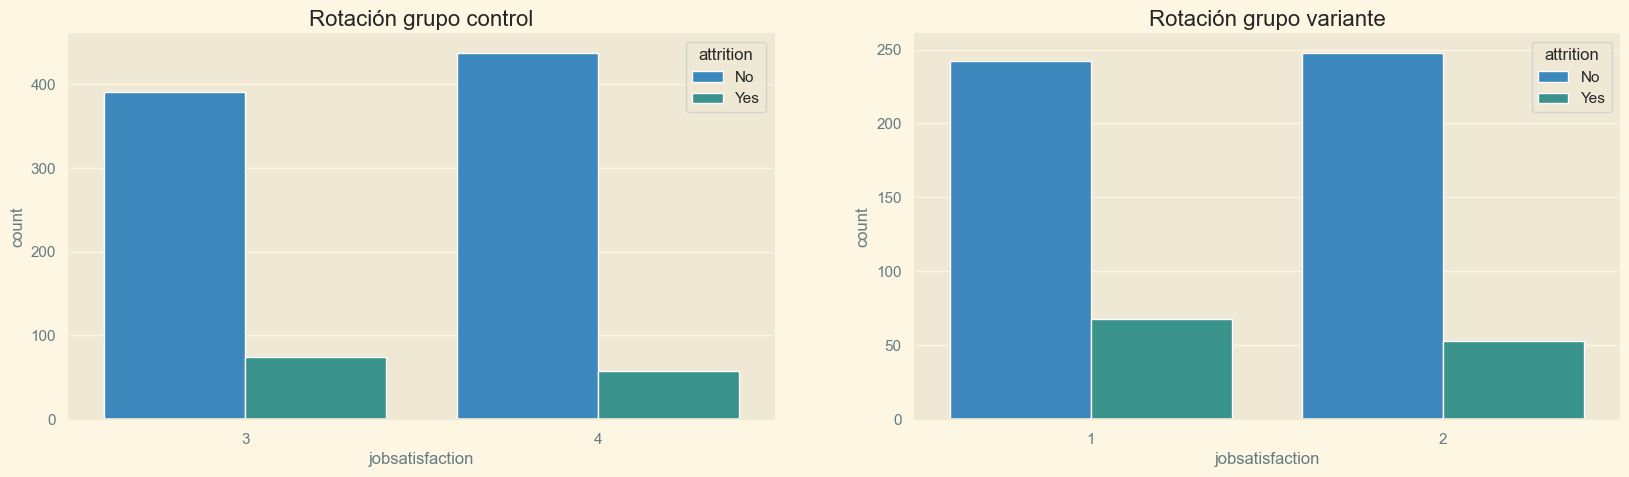

In [92]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))

# Gráfico 1: Tasa de rotación del grupo control
sns.countplot(x="jobsatisfaction", hue="attrition", data=df_control, ax=axes[0])
axes[0].set_title("Rotación grupo control")

# Gráfico 2: asa de rotación del grupo variante
sns.countplot(x="jobsatisfaction", hue="attrition", data=df_variante, ax=axes[1])
axes[1].set_title("Rotación grupo variante");

##NOTA: CÓMO PONER QUE EL AXIS Y TENGA LOS MISMO VALORES

In [93]:
#Paso 3. Análisis estadístico para determinar si hay una diferencia significativa en la tasa de rotación entre los grupos de control y variante
#--> Verificamos: Normalidad; Homogeneidad de Varianzas e Independencia

In [94]:
#A. NORMALIDAD (con Shapiro)

def normalidad(dataframe, columna):
    statistic, p_value = stats.shapiro(dataframe[columna])
    if p_value > 0.05:
        print(f"Para la columna {columna} los datos siguen una distribución normal.")
    else:
        print(f"Para la columna {columna} los datos no siguen una distribución normal.")

normalidad(definitivo, "attrition_number")

Para la columna attrition_number los datos no siguen una distribución normal.


In [102]:
#Puesto que no no sigue una distribución normal, hacemos el t-test de ManWhitney
grupo1 = df_control["attrition_number"] 
grupo2 = df_variante["attrition_number"] 

statistic, pvalue = mannwhitneyu(grupo1, grupo2)
pvalue

0.0011906255145925511

In [96]:
#Puesto que no no sigue una distribución normal, hacemos el t-test de ManWhitney
grupo1 = df_control["attrition_number"] == 1
grupo2 = df_variante["attrition_number"] == 1

statistic, pvalue = mannwhitneyu(grupo1, grupo2)
pvalue

0.0011906255145925511

In [97]:
#Paso 4. Análisis de resultados
#---> Como es menor q 0.05, se rechaza la hipótesis nula (no existe una relación entre el nivel de satisfacción y la rotación) y es significativa?

In [98]:
#Paso 5. Calcular la magnitud de esta relación utilizando estadísticas como la diferencia de medias por ejemplo

In [99]:
definitivo["employeenumber"].duplicated().sum()

491

In [103]:
duplicados = definitivo[definitivo["employeenumber"].duplicated(keep=False)].sort_values("employeenumber", ascending=False)
duplicados.head(3)

,age,attrition,businesstravel,dailyrate,department,distancefromhome,education,education_cat,educationfield,employeenumber,environmentsatisfaction_cat,gender,gender_cat,jobinvolvement,jobinvolvement_cat,joblevel,jobrole,jobsatisfaction,maritalstatus,monthlyrate,numcompaniesworked,overtime,percentsalaryhike,relationshipsatisfaction,relationshipsatisfaction_cat,stockoptionlevel,trainingtimeslastyear,worklifebalance_cat,yearsatcompany,yearssincelastpromotion,yearswithcurrmanager,remotework,attrition_number,environmentsatisfaction,hourlyrate,totalworkingyears,worklifebalance
1471,28,No,non-travel,1103.0,Unknown,16.0,3,college,medical,1947.0,medium,0,male,3,involved,1,research scientist,3,single,2122.0,1,No,14,3,medium,0,3,little,5,1,4,No,0,3.0,49.0,5.0,2.0
781,28,No,non-travel,1103.0,Unknown,16.0,3,college,medical,1947.0,medium,0,male,3,involved,1,research scientist,3,single,2122.0,1,No,14,3,medium,0,3,little,5,1,4,Yes,0,3.0,49.0,5.0,2.0
1509,42,No,Unknown,1396.0,Unknown,6.0,3,college,medical,1911.0,medium,0,male,3,involved,3,research director,1,married,14842.0,9,No,13,2,little,1,3,maximun,13,5,7,No,0,3.0,83.0,18.0,4.0


In [108]:
duplicados[duplicados["employeenumber"] == 1947.0]

,age,attrition,businesstravel,dailyrate,department,distancefromhome,education,education_cat,educationfield,employeenumber,environmentsatisfaction_cat,gender,gender_cat,jobinvolvement,jobinvolvement_cat,joblevel,jobrole,jobsatisfaction,maritalstatus,monthlyrate,numcompaniesworked,overtime,percentsalaryhike,relationshipsatisfaction,relationshipsatisfaction_cat,stockoptionlevel,trainingtimeslastyear,worklifebalance_cat,yearsatcompany,yearssincelastpromotion,yearswithcurrmanager,remotework,attrition_number,environmentsatisfaction,hourlyrate,totalworkingyears,worklifebalance
1471,28,No,non-travel,1103.0,Unknown,16.0,3,college,medical,1947.0,medium,0,male,3,involved,1,research scientist,3,single,2122.0,1,No,14,3,medium,0,3,little,5,1,4,No,0,3.0,49.0,5.0,2.0
781,28,No,non-travel,1103.0,Unknown,16.0,3,college,medical,1947.0,medium,0,male,3,involved,1,research scientist,3,single,2122.0,1,No,14,3,medium,0,3,little,5,1,4,Yes,0,3.0,49.0,5.0,2.0


In [109]:
duplicados[duplicados["employeenumber"] == 1947.0].values

array([[28, 'No', 'non-travel', 1103.0, 'Unknown', 16.0, 3, 'college',
        'medical', 1947.0, 'medium', 0, 'male', 3, 'involved', 1,
        ' research scientist ', 3, 'single', 2122.0, 1, 'No', 14, 3,
        'medium', 0, 3, 'little', 5, 1, 4, 'No', 0, 3.0, 49.0, 5.0, 2.0],
       [28, 'No', 'non-travel', 1103.0, 'Unknown', 16.0, 3, 'college',
        'medical', 1947.0, 'medium', 0, 'male', 3, 'involved', 1,
        ' research scientist ', 3, 'single', 2122.0, 1, 'No', 14, 3,
        'medium', 0, 3, 'little', 5, 1, 4, 'Yes', 0, 3.0, 49.0, 5.0, 2.0]],
      dtype=object)

In [117]:
lista_emplo_num = duplicados["employeenumber"].unique()
lista_emplo_num[:3]

array([1947., 1911., 1898.])

In [120]:
lista_emplo_num

array([1947., 1911., 1898., 1869., 1821., 1816., 1804., 1797., 1778.,
       1541., 1195., 1185., 1162., 1161., 1160., 1157., 1135., 1131.,
       1069., 1044.,  972.,  966.,  956.,  941.,  927.,  913.,  842.,
        823.,  803.,  789.,  762.,  747.,  742.,  728.,  725.,  724.,
        717.,  710.,  682.,  663.,  653.,  621.,  586.,  569.,  534.,
        530.,  524.,  522.,  517.,  507.,  502.,  500.,  495.,  488.,
        482.,  478.,  476.,  475.,  470.,  465.,  460.,  458.,  455.,
        454.,  448.,  447.,  446.,  438.,  433.,  430.,  424.,  423.,
        416.,  401.,  389.,  381.,  376.,   nan])

In [122]:
for empleado in lista_emplo_num[:-1]:
    
    resultado_zip = list(zip(df_data_copy.columns, duplicados[duplicados["employeenumber"] == empleado].values[0], duplicados[duplicados["employeenumber"] == empleado].values[1]))
    for tupla in resultado_zip:
        if tupla[1] != tupla[2]:
            print(empleado)
            print(tupla[0])
            print("....")


1947.0
remotework
....
1911.0
remotework
....
1898.0
remotework
....
1869.0
dailyrate
....
1869.0
remotework
....
1821.0
distancefromhome
....
1816.0
distancefromhome
....
1816.0
environmentsatisfaction_cat
....
1816.0
environmentsatisfaction
....
1797.0
remotework
....
1778.0
remotework
....
1541.0
remotework
....
1185.0
dailyrate
....
1185.0
hourlyrate
....
1162.0
remotework
....
1161.0
remotework
....
1160.0
remotework
....
1157.0
remotework
....
1135.0
remotework
....
1131.0
distancefromhome
....
1069.0
distancefromhome
....
1069.0
environmentsatisfaction_cat
....
1069.0
environmentsatisfaction
....
1044.0
hourlyrate
....
1044.0
totalworkingyears
....
972.0
distancefromhome
....
972.0
environmentsatisfaction_cat
....
972.0
environmentsatisfaction
....
972.0
totalworkingyears
....
966.0
remotework
....
956.0
distancefromhome
....
956.0
environmentsatisfaction_cat
....
956.0
environmentsatisfaction
....
956.0
totalworkingyears
....
941.0
remotework
....
941.0
hourlyrate
....
941.0
to

In [114]:
resultado_zip = list(zip(df_data_copy.columns, duplicados[duplicados["employeenumber"] == 1947.0].values[0], duplicados[duplicados["employeenumber"] == 1947.0].values[1]))
resultado_zip[:4]

[('age', 28, 28),
 ('attrition', 'No', 'No'),
 ('businesstravel', 'non-travel', 'non-travel'),
 ('dailyrate', 1103.0, 1103.0)]

In [116]:
for tupla in resultado_zip:
    if tupla[1] != tupla[2]:
        print(tupla[0])

remotework


In [106]:
duplicados[duplicados["employeenumber"] == 1947.0].values[0]

array([28, 'No', 'non-travel', 1103.0, 'Unknown', 16.0, 3, 'college',
       'medical', 1947.0, 'medium', 0, 'male', 3, 'involved', 1,
       ' research scientist ', 3, 'single', 2122.0, 1, 'No', 14, 3,
       'medium', 0, 3, 'little', 5, 1, 4, 'No', 0, 3.0, 49.0, 5.0, 2.0],
      dtype=object)

In [107]:
duplicados[duplicados["employeenumber"] == 1947.0].values[1]

array([28, 'No', 'non-travel', 1103.0, 'Unknown', 16.0, 3, 'college',
       'medical', 1947.0, 'medium', 0, 'male', 3, 'involved', 1,
       ' research scientist ', 3, 'single', 2122.0, 1, 'No', 14, 3,
       'medium', 0, 3, 'little', 5, 1, 4, 'Yes', 0, 3.0, 49.0, 5.0, 2.0],
      dtype=object)

- Nuestra métrica es "jobsatisfaction"?(1-4, no 1-5) o hay que incluir otras?
- La lógica que seguimos es q tenemos q hacer los test de normalidad, homogeneidad de varianza e independencia y si es normal hacer t-student y si no es normal, la no paramétrica (mannwhitneyu)?
- Estamos haciendo bien el test mannwhitneyu? 
- Duplicados de employeenumber - cómo manejarlo?
- En los gráficos - cómo asegurarnos que tienen la misma medición en la axis y


SQL - problemas en la inserción de datos de foreign keys

# FASE 5. CREACIÓN DE UNA ETL

# FASE 6. REPORTE DE RESULTADOS

# 7. Recomendaciones

- Añadir info sobre el número de hijos, respetando la privacidad del empleado
- Añadir información completa sobre "monthly income" - solamente disponíamos del 48% de los datos

In [101]:
df_data_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1571 entries, 0 to 1613
Data columns (total 37 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   age                           1571 non-null   int64  
 1   attrition                     1571 non-null   object 
 2   businesstravel                1571 non-null   object 
 3   dailyrate                     1450 non-null   float64
 4   department                    1571 non-null   object 
 5   distancefromhome              1379 non-null   float64
 6   education                     1571 non-null   int64  
 7   education_cat                 1571 non-null   object 
 8   educationfield                1571 non-null   object 
 9   employeenumber                1156 non-null   float64
 10  environmentsatisfaction_cat   1571 non-null   object 
 11  gender                        1571 non-null   int64  
 12  gender_cat                    1571 non-null   object 
 13  jobinvol